# Librerías y Carga de datos

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [9]:
df= pd.read_excel("C:/Users/casti/Desktop/df.xlsx")
df.head()


,fechas,Bono,Igpa,Blumar,Camanchaca,Ipsa,r_ipsa,r_igpa,r_blum,r_Cam
0,2012-03-01,5.47,22206.86,149.24,36.53,4671.28,NaN,NaN,NaN,NaN
1,2012-04-01,5.36,21925.87,137.37,35.03,4585.77,-1.847509,-1.273403,-8.287773,-4.192900
2,2012-05-01,4.95,20802.59,118.71,28.10,4318.16,-6.012864,-5.258972,-14.599447,-22.043526
3,2012-06-01,5.03,21079.74,116.47,27.63,4400.10,1.879788,1.323489,-1.904981,-1.686744
4,2012-07-01,5.04,20447.87,111.24,25.28,4227.56,-4.000227,-3.043367,-4.594370,-8.888857


# Gráficos par Anális Exploratorio

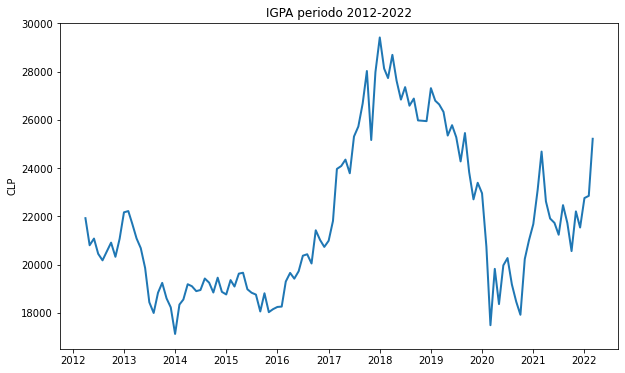

In [42]:
sns.set_palette("tab10") 
plt.figure(figsize=(10, 6))
plt.plot(df['fechas'], df['Igpa'], linewidth=2)
plt.title('IGPA periodo 2012-2022')
plt.xlabel('')
plt.ylabel('CLP')
plt.show()

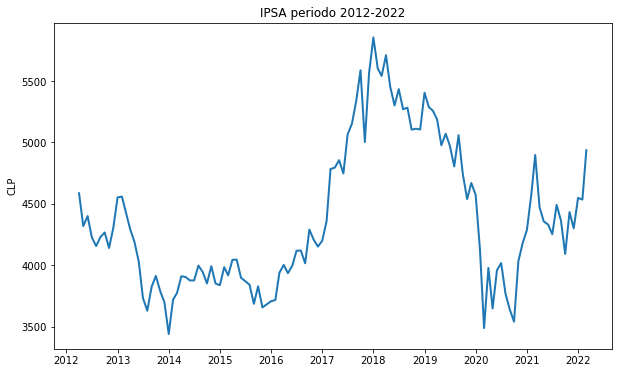

In [43]:
sns.set_palette("tab10") 
plt.figure(figsize=(10, 6))
plt.plot(df['fechas'], df['Ipsa'], linewidth=2)
plt.title('IPSA periodo 2012-2022')
plt.xlabel('')
plt.ylabel('CLP')
plt.show()

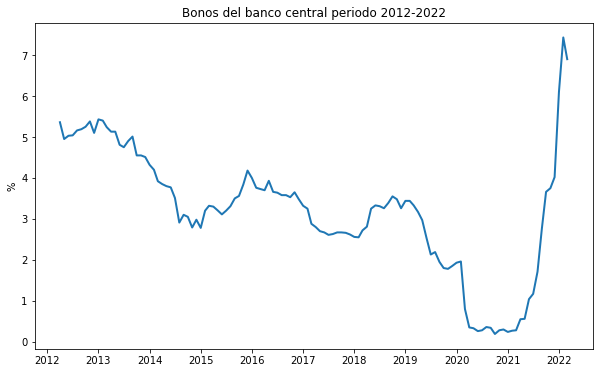

In [44]:
sns.set_palette("tab10") 
plt.figure(figsize=(10, 6))
plt.plot(df['fechas'], df['Bono'], linewidth=2)
plt.title('Bonos del banco central periodo 2012-2022')
plt.xlabel('')
plt.ylabel('%')
plt.show()

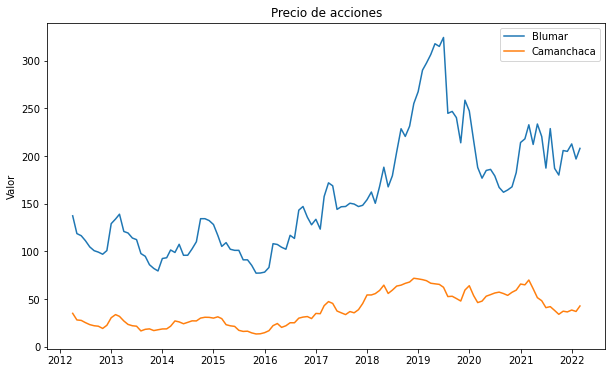

In [45]:
sns.set_palette("tab10") 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='fechas', y='Blumar', label='Blumar')
sns.lineplot(data=df, x='fechas', y='Camanchaca', label='Camanchaca')

plt.title('Precio de acciones')
plt.xlabel('')
plt.ylabel('Valor')

plt.legend()
plt.show()


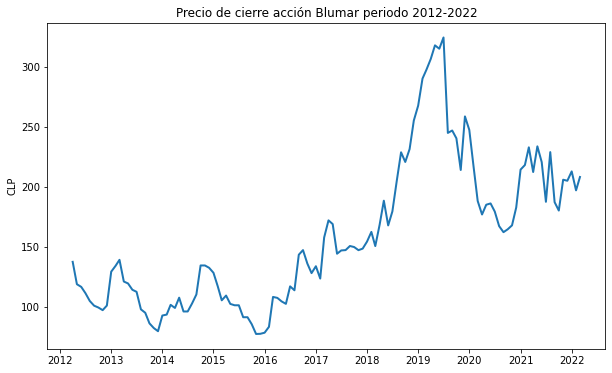

In [46]:
sns.set_palette("tab10") 
plt.figure(figsize=(10, 6))
plt.plot(df['fechas'], df['Blumar'], linewidth=2)
plt.title('Precio de cierre acción Blumar periodo 2012-2022')
plt.xlabel('')
plt.ylabel('CLP')
plt.show()

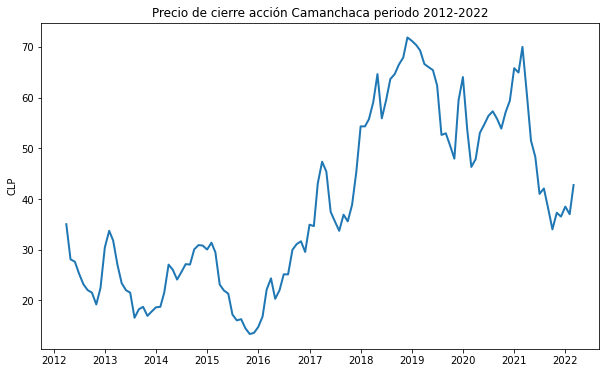

In [47]:
sns.set_palette("tab10") 
plt.figure(figsize=(10, 6))
plt.plot(df['fechas'], df['Camanchaca'], linewidth=2)
plt.title('Precio de cierre acción Camanchaca periodo 2012-2022')
plt.xlabel('')
plt.ylabel('CLP')
plt.show()

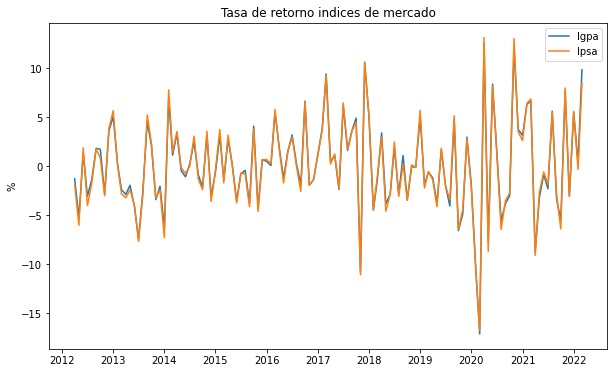

In [48]:
sns.set_palette("tab10") 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='fechas', y='r_igpa', label='Igpa')
sns.lineplot(data=df, x='fechas', y='r_ipsa', label='Ipsa')

plt.title('Tasa de retorno indices de mercado')
plt.xlabel('')
plt.ylabel('%')

plt.legend()
plt.show()

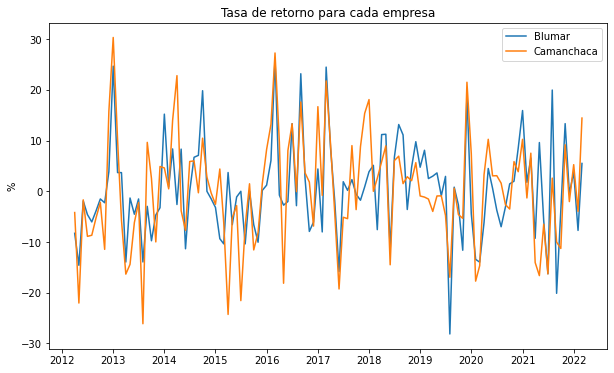

In [49]:
sns.set_palette("tab10") 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='fechas', y='r_blum', label='Blumar')
sns.lineplot(data=df, x='fechas', y='r_Cam', label='Camanchaca')

plt.title('Tasa de retorno para cada empresa')
plt.xlabel('')
plt.ylabel('%')

plt.legend()
plt.show()

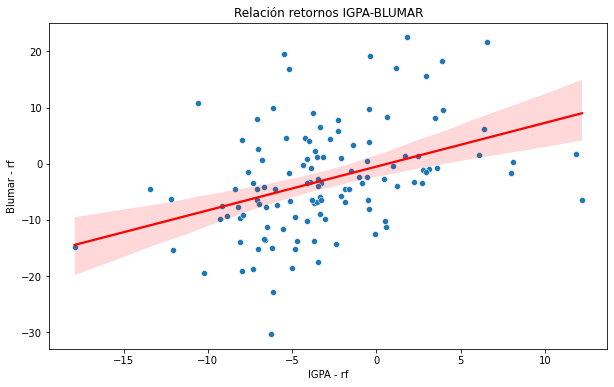

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['r_igpa'] - df['Bono'], y=df['r_blum'] - df['Bono'])
sns.regplot(x=df['r_igpa'] - df['Bono'], y=df['r_blum'] - df['Bono'], scatter=False, color='red')

plt.title('Relación retornos IGPA-BLUMAR')
plt.xlabel('IGPA - rf')
plt.ylabel('Blumar - rf')

# Mostrar el gráfico
plt.show()


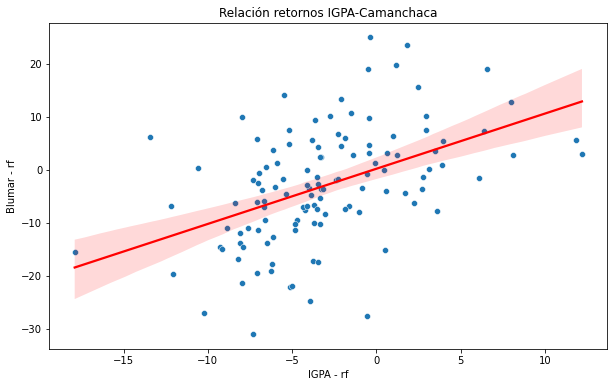

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['r_igpa'] - df['Bono'], y=df['r_Cam'] - df['Bono'])
sns.regplot(x=df['r_igpa'] - df['Bono'], y=df['r_Cam'] - df['Bono'], scatter=False, color='red')

plt.title('Relación retornos IGPA-Camanchaca')
plt.xlabel('IGPA - rf')
plt.ylabel('Blumar - rf')

# Mostrar el gráfico
plt.show()

In [53]:
df = df.assign(rm_rf=df['r_igpa'] - df['Bono'],
               blumar_rf=df['r_blum'] - df['Bono'],
               cam_rf=df['r_Cam'] - df['Bono'])
df.head()

,fechas,Bono,Igpa,Blumar,Camanchaca,Ipsa,r_ipsa,r_igpa,r_blum,r_Cam,rm_rf,blumar_rf,cam_rf
1,2012-04-01,5.36,21925.87,137.37,35.03,4585.77,-1.847509,-1.273403,-8.287773,-4.192900,-6.633403,-13.647773,-9.552900
2,2012-05-01,4.95,20802.59,118.71,28.10,4318.16,-6.012864,-5.258972,-14.599447,-22.043526,-10.208972,-19.549447,-26.993526
3,2012-06-01,5.03,21079.74,116.47,27.63,4400.10,1.879788,1.323489,-1.904981,-1.686744,-3.706511,-6.934981,-6.716744
4,2012-07-01,5.04,20447.87,111.24,25.28,4227.56,-4.000227,-3.043367,-4.594370,-8.888857,-8.083367,-9.634370,-13.928857
5,2012-08-01,5.16,20176.31,104.72,23.18,4155.68,-1.714892,-1.336958,-6.039991,-8.672373,-6.496958,-11.199991,-13.832373


# Calculo de beta por definición 

Blumar

In [58]:
X = sm.add_constant(df['rm_rf'])  # Agregar la constante al predictor
y = df['blumar_rf']
lm1 = sm.OLS(y, X).fit()
# Mostrar el resumen del modelo
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              blumar_rf   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     22.32
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           6.42e-06
Time:                        00:38:11   Log-Likelihood:                -430.21
No. Observations:                 120   AIC:                             864.4
Df Residuals:                     118   BIC:                             870.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5074      0.950     -0.534      0.5

C:\Users\casti\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
# Calcular la covarianza y la varianza
covb = np.cov(df['rm_rf'], df['blumar_rf'])[0,1]
variance_rm_rf = np.var(df['rm_rf'])

# Calcular el coeficiente de la covarianza/varianza
covariance_ratio = covb / variance_rm_rf
print("Covarianza / Varianza (ratio):", covariance_ratio)


Covarianza / Varianza (ratio): 0.7861448869312894


Camanchaca

In [68]:
X = sm.add_constant(df['rm_rf'])  # Agregar la constante al predictor
y = df['cam_rf']
lm2 = sm.OLS(y, X).fit()
# Mostrar el resumen del modelo
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 cam_rf   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     33.76
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           5.40e-08
Time:                        02:10:54   Log-Likelihood:                -440.10
No. Observations:                 120   AIC:                             884.2
Df Residuals:                     118   BIC:                             889.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1515      1.032      0.147      0.8

C:\Users\casti\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
# Calcular la covarianza y la varianza
covcam = np.cov(df['rm_rf'], df['cam_rf'])[0,1]
covariance_ratio = covcam / variance_rm_rf
print("Covarianza / Varianza (ratio):", covariance_ratio)

Covarianza / Varianza (ratio): 1.049815964597929


# Función Núcleo Manual


In [79]:
import numpy as np
import pandas as pd

def manual_loess(x, y, h):
    x_array = np.array(x)  # Convertir la columna x a un arreglo de NumPy
    W = np.zeros((len(x), len(x)))

    for i in range(len(x)):
        w = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * ((x_array - x_array[i]) / h)**2)
        W[i, i] = w[i] / np.sum(w)

    X = np.column_stack((np.ones_like(x_array), x_array))
    Y = np.array(y)

    beta, _, _, _ = np.linalg.lstsq(X.T @ W @ X, X.T @ W @ Y, rcond=None)

    return beta






SyntaxError: cannot assign to function call (Temp/ipykernel_19112/2994676373.py, line 15)

In [73]:
import numpy as np

# Crear una matriz de 2x3
matriz = np.array([[1, 2, 3],
                   [4, 5, 6]])

print(matriz)
matriz.T

[[1 2 3]
 [4 5 6]]


array([[1, 4],
       [2, 5],
       [3, 6]])

In [77]:
manual_loess(df['rm_rf'],df['r_Cam'],0.4)

array([2.09660919, 0.29837133])